### Importing Libraries

In [54]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import datetime as dt
import numpy as np
import hvplot.pandas
import panel as pn
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
pn.extension("plotly")
%matplotlib inline

### Importing Data from CSV Files

In [55]:
xlk_csv = pd.read_csv("../Project_1/xlk.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
xlf_csv = pd.read_csv("../Project_1/XLF.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
vnq_csv = pd.read_csv("../Project_1/VNQ.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
spy_csv = pd.read_csv("../Project_1/spy.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
ibb_csv = pd.read_csv("../Project_1/ibb.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
covid_data = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv", 
                         index_col="submission_date", parse_dates=True)

### Creating Dataframe for ETF Prices Pre-Covid

In [56]:
xlk_pre_covid = xlk_csv.reset_index()
xlk_pre_covid = xlk_pre_covid[0:767]
xlk_pre_covid.columns = ['Date', 'Tech']

xlf_pre_covid = xlf_csv.reset_index()
xlf_pre_covid = xlf_pre_covid[0:767]
xlf_pre_covid.columns = ['Date', 'Finance']
xlf_pre_covid = xlf_pre_covid.drop(columns=['Date'])

vnq_pre_covid = vnq_csv.reset_index()
vnq_pre_covid = vnq_pre_covid[0:767]
vnq_pre_covid.columns = ['Date', 'Real_Estate']
vnq_pre_covid = vnq_pre_covid.drop(columns=['Date'])

spy_pre_covid = spy_csv.reset_index()
spy_pre_covid = spy_pre_covid[0:767]
spy_pre_covid.columns = ['Date', 'SNP500']
spy_pre_covid = spy_pre_covid.drop(columns=['Date'])

ibb_pre_covid = ibb_csv.reset_index()
ibb_pre_covid = ibb_pre_covid[0:767]
ibb_pre_covid.columns = ['Date', 'BioTech']
ibb_pre_covid = ibb_pre_covid.drop(columns=['Date'])

pre_covid_concat = pd.concat([xlk_pre_covid, xlf_pre_covid, vnq_pre_covid,
                              spy_pre_covid, ibb_pre_covid], axis = "columns", join = "inner")
pre_covid_concat.set_index(["Date"], inplace = True)
pre_covid_concat.head()

,Tech,Finance,Real_Estate,SNP500,BioTech
Date,,,,,
2017-01-03,48.79,23.51,82.80,225.24,90.08
2017-01-04,48.96,23.70,84.01,226.58,92.41
2017-01-05,49.04,23.46,84.28,226.40,92.70
2017-01-06,49.40,23.54,84.29,227.21,93.42
2017-01-09,49.39,23.38,83.53,226.46,94.76


### Creating Dataframe for ETF Prices During Covid

In [57]:
xlk_post_covid = xlk_csv.reset_index()
xlk_post_covid = xlk_post_covid[767:]
xlk_post_covid.columns = ['Date', 'Tech']

xlf_post_covid = xlf_csv.reset_index()
xlf_post_covid = xlf_post_covid[767:]
xlf_post_covid.columns = ['Date', 'Finance']
xlf_post_covid = xlf_post_covid.drop(columns=['Date'])

vnq_post_covid = vnq_csv.reset_index()
vnq_post_covid = vnq_post_covid[767:]
vnq_post_covid.columns = ['Date', 'Real_Estate']
vnq_post_covid = vnq_post_covid.drop(columns=['Date'])

spy_post_covid = spy_csv.reset_index()
spy_post_covid = spy_post_covid[767:]
spy_post_covid.columns = ['Date', 'SNP500']
spy_post_covid = spy_post_covid.drop(columns=['Date'])

ibb_post_covid = ibb_csv.reset_index()
ibb_post_covid = ibb_post_covid[767:]
ibb_post_covid.columns = ['Date', 'BioTech']
ibb_post_covid = ibb_post_covid.drop(columns=['Date'])

during_covid_concat = pd.concat([xlk_post_covid, xlf_post_covid, vnq_post_covid,
                              spy_post_covid, ibb_post_covid], axis = "columns", join = "inner")
during_covid_concat.set_index(["Date"], inplace = True)
during_covid_concat.head()

,Tech,Finance,Real_Estate,SNP500,BioTech
Date,,,,,
2020-01-22,97.43,30.86,94.98,331.34,120.55
2020-01-23,97.89,30.78,95.78,331.72,119.50
2020-01-24,97.43,30.39,95.45,328.77,116.88
2020-01-27,95.11,29.92,94.99,323.50,116.09
2020-01-28,96.93,30.27,95.37,326.89,117.32


### Creating Covid Cases Dataframe

In [58]:
covid_clean_data = covid_data[["tot_cases","tot_death"]]
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean.reset_index(inplace = True)
covid_really_clean.columns = ['Date', 'tot_cases', 'tot_death']
covid_really_clean.set_index('Date', inplace=True)
covid_really_clean.head()

,tot_cases,tot_death
Date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0


### Concatenating Covid Dataframe with ETF Prices

In [59]:
covid_data_impact = pd.concat([covid_really_clean, during_covid_concat], axis = 'columns',
                              join = 'inner'
                             )
covid_data_impact.head()

,tot_cases,tot_death,Tech,Finance,Real_Estate,SNP500,BioTech
Date,,,,,,,
2020-01-22,1,0,97.43,30.86,94.98,331.34,120.55
2020-01-23,1,0,97.89,30.78,95.78,331.72,119.50
2020-01-24,2,0,97.43,30.39,95.45,328.77,116.88
2020-01-27,5,0,95.11,29.92,94.99,323.50,116.09
2020-01-28,5,0,96.93,30.27,95.37,326.89,117.32


## Statistical analysis of ETF's Pre-Covid

#### Percentage Change

In [60]:
pre_covid_pct_change = pre_covid_concat.pct_change().dropna()
pre_covid_pct_change.head()

,Tech,Finance,Real_Estate,SNP500,BioTech
Date,,,,,
2017-01-04,0.003484,0.008082,0.014614,0.005949,0.025866
2017-01-05,0.001634,-0.010127,0.003214,-0.000794,0.003138
2017-01-06,0.007341,0.003410,0.000119,0.003578,0.007767
2017-01-09,-0.000202,-0.006797,-0.009016,-0.003301,0.014344
2017-01-10,0.000202,0.002139,-0.008500,0.000000,0.007809


#### Standard Deviation

In [61]:
pre_covid_std = pre_covid_concat.std()
pre_covid_std.head()

Tech           10.516747
Finance         1.948106
Real_Estate     5.168474
SNP500         23.704108
BioTech         7.084195
dtype: float64

#### Covariance and Variance of All ETF's Relative to SNP500

In [62]:
pre_covid_xlk_cov = pre_covid_concat['Tech'].rolling(window = 2).cov(pre_covid_concat['SNP500']).dropna()
pre_covid_xlf_cov = pre_covid_concat['Finance'].rolling(window = 2).cov(pre_covid_concat['SNP500']).dropna()
pre_covid_vnq_cov = pre_covid_concat['Real_Estate'].rolling(window = 2).cov(pre_covid_concat['SNP500']).dropna()
pre_covid_ibb_cov = pre_covid_concat['BioTech'].rolling(window = 2).cov(pre_covid_concat['SNP500']).dropna()
pre_covid_var = pre_covid_concat['SNP500'].rolling(window = 2).var().dropna()
pre_covid_var.head()

Date
2017-01-04    0.89780
2017-01-05    0.01620
2017-01-06    0.32805
2017-01-09    0.28125
2017-01-10    0.00000
Name: SNP500, dtype: float64

#### Beta Values for All ETF's

In [63]:
xlk_beta_pre_covid = pre_covid_xlk_cov/pre_covid_var
xlf_beta_pre_covid = pre_covid_xlf_cov/pre_covid_var
vnq_beta_pre_covid = pre_covid_vnq_cov/pre_covid_var
ibb_beta_pre_covid = pre_covid_ibb_cov/pre_covid_var
beta_pre_covid = pd.concat([xlk_beta_pre_covid, xlf_beta_pre_covid, vnq_beta_pre_covid, ibb_beta_pre_covid],
                          axis = 'columns', join = 'inner')
beta_pre_covid.columns = ['Tech', 'Finance', 'Real_Estate', 'BioTech']
beta_pre_covid.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2017-01-04,0.126866,0.141791,0.902985,1.738806
2017-01-05,-0.444444,1.333333,-1.500000,-1.611111
2017-01-06,0.444444,0.098765,0.012346,0.888889
2017-01-09,0.013333,0.213333,1.013333,-1.786667
2017-01-10,-inf,inf,-inf,-inf


#### Sharpe Ratios and Volatility

In [64]:
daily_returns_precovid = pre_covid_concat.pct_change().dropna()
std_pre_covid = pre_covid_concat.std()
volatility = std_pre_covid*np.sqrt(252)
correlation_pre_covid = pre_covid_concat.corr()
correlation_pre_covid_sum = correlation_pre_covid.sum(axis=0).sort_values()
sharpe_ratios_precovid = (daily_returns_precovid.mean()*252) / (daily_returns_precovid.std() * np.sqrt(252))
sharpe_ratios_precovid.sort_values(ascending = False, inplace = True)


## Graphical Representations Pre Covid

### Data Trend

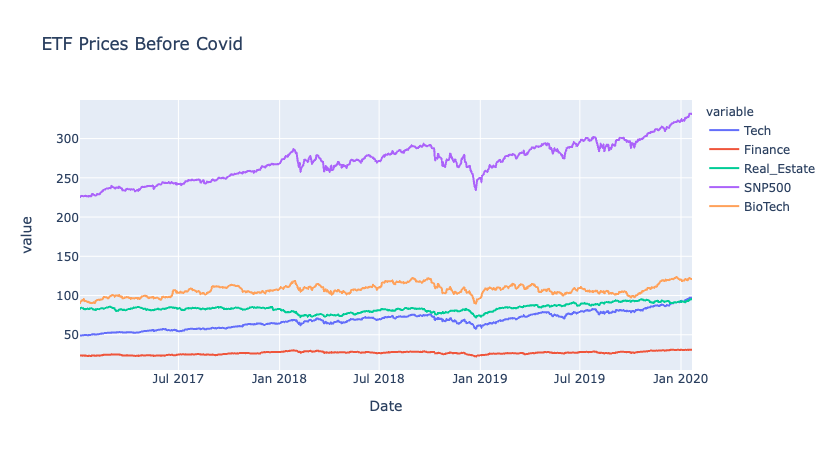

In [65]:
precovid_trend = px.line(pre_covid_concat, title = "ETF Prices Before Covid")
precovid_trend

### Beta-Plot

In [66]:
pre_covid_beta = beta_pre_covid.hvplot(figsize = (10, 5), title = 'Beta Values Pre-Covid'
                                       ).opts(ylim=(-150, 220))
pre_covid_beta

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Sharpe Ratios Barplot

In [67]:
sharpe_ratios_precovid_graph = sharpe_ratios_precovid.hvplot.bar(figsize = (10, 5),
                                                                 title = "Sharpe Ratios Pre Covid")
sharpe_ratios_precovid_graph

:Bars   [index]   (0)

### Boxplot of Pre Covid Dataframe

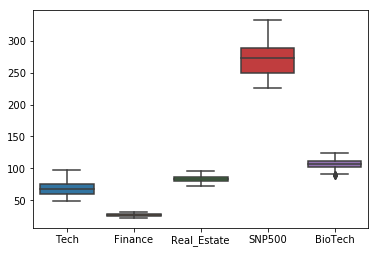

In [68]:
sns.boxplot(data = pre_covid_concat)

## Statistical analysis of ETF's During Covid

#### Percentage Change and Cumulative Returns

In [69]:
pct_change_covid = during_covid_concat.pct_change().dropna()
portfolio_unchanged = pct_change_covid.drop(columns=["SNP500"])
cumulative_returns = (1 + portfolio_unchanged).cumprod()
cumulative_returns.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2020-01-23,1.004721,0.997408,1.008423,0.991290
2020-01-24,1.000000,0.984770,1.004948,0.969556
2020-01-27,0.976188,0.969540,1.000105,0.963003
2020-01-28,0.994868,0.980881,1.004106,0.973206
2020-01-29,0.997434,0.979261,1.000421,0.972543


#### Covariance and Variance of All ETF's Relative to SNP500

In [70]:
during_covid_xlk_cov = during_covid_concat['Tech'].rolling(window = 2).cov(during_covid_concat['SNP500']).dropna()
during_covid_xlf_cov = during_covid_concat['Finance'].rolling(window = 2).cov(during_covid_concat['SNP500']).dropna()
during_covid_vnq_cov = during_covid_concat['Real_Estate'].rolling(window = 2).cov(during_covid_concat['SNP500']).dropna()
during_covid_ibb_cov = during_covid_concat['BioTech'].rolling(window = 2).cov(during_covid_concat['SNP500']).dropna()
during_covid_var = during_covid_concat['SNP500'].rolling(window = 2).var().dropna()
during_covid_var.head()

Date
2020-01-23     0.07220
2020-01-24     4.35125
2020-01-27    13.88645
2020-01-28     5.74605
2020-01-29     0.03645
Name: SNP500, dtype: float64

#### Beta Values for All ETF's

In [71]:
xlk_beta_covid = during_covid_xlk_cov/during_covid_var
xlf_beta_covid = during_covid_xlf_cov/during_covid_var
vnq_beta_covid = during_covid_vnq_cov/during_covid_var
ibb_beta_covid = during_covid_ibb_cov/during_covid_var
pct_change_covid = covid_really_clean.pct_change()
beta_during_covid = pd.concat([xlk_beta_covid, xlf_beta_covid, vnq_beta_covid, ibb_beta_covid],
                             axis = 'columns', join = 'inner')
beta_during_covid.columns = ['Tech', 'Finance', 'Real_Estate', 'BioTech']
beta_during_covid.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2020-01-23,1.210526,-0.210526,2.105263,-2.763158
2020-01-24,0.155932,0.132203,0.111864,0.888136
2020-01-27,0.440228,0.089184,0.087287,0.149905
2020-01-28,0.536873,0.103245,0.112094,0.362832
2020-01-29,-0.925926,0.185185,1.296296,0.296296


#### Sharpe Ratios and Volatility 

In [72]:
daily_returns_covid = during_covid_concat.pct_change().dropna()
std_during_covid = during_covid_concat.std()
during_volatility = std_during_covid*np.sqrt(252)
correlation_covid = during_covid_concat.corr()
correlation_covid_sum = correlation_covid.sum(axis=0).sort_values()
sharpe_ratios_covid = (daily_returns_covid.mean()*252) / (daily_returns_covid.std() * np.sqrt(252))
sharpe_ratios_covid.sort_values(ascending = False, inplace = True)

## Graphical Representations During Covid

### Data Trend

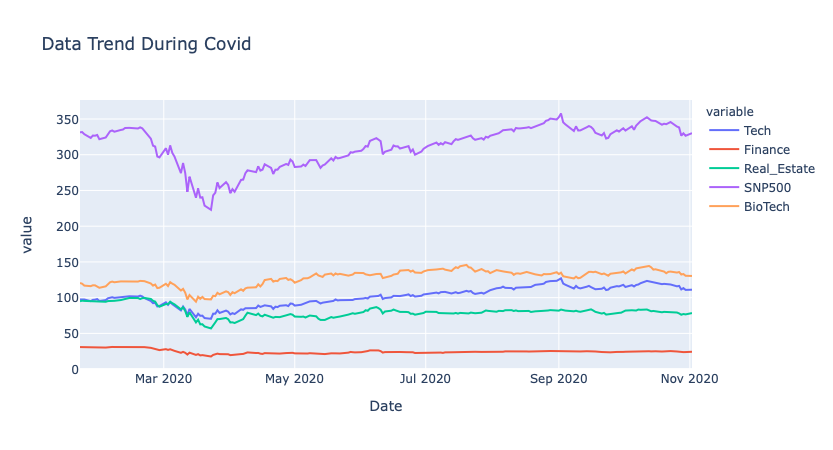

In [73]:
covid_trend = px.line(during_covid_concat, title = "Data Trend During Covid")
covid_trend

### Cumulative Returns 

Text(0.5, 1.0, 'Portfolio Cumulative Returns')

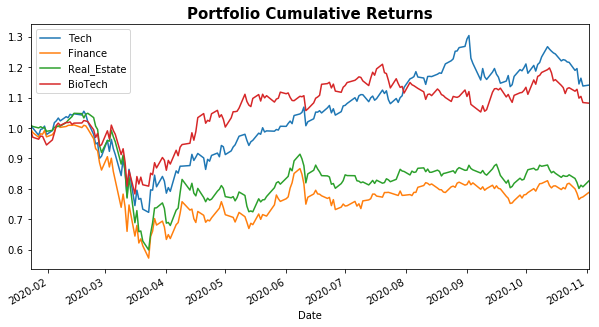

In [74]:
cumulative_returns_plot = cumulative_returns.plot(figsize=(10,5))
cumulative_returns_plot.set_title(label = 'Portfolio Cumulative Returns', fontsize=15, fontweight="bold")

### Beta-Plot

In [75]:
during_covid_beta = beta_during_covid.hvplot(figsize = (20, 10), title = 'Beta During Covid')
during_covid_beta

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Sharpe Ratios Barplot

In [76]:
sharpe_ratios_bar = sharpe_ratios_covid.hvplot.bar(title = 'Sharpe Ratios During Covid')
sharpe_ratios_bar

:Bars   [index]   (0)

### Boxplot 

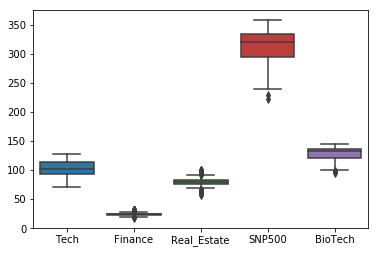

In [77]:
sns.boxplot(data = during_covid_concat)

## Concatenation of Plots

### ETF Trend from 2017 to Present Day

In [78]:
before_covid = pre_covid_concat.hvplot(title = "ETF Trend from 2017-Present")
during_covid = during_covid_concat.hvplot()
full_trend = before_covid * during_covid
full_trend

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Date]   (value)

### Beta Concat

In [79]:
pre_covid_beta = beta_pre_covid.hvplot(figsize = (10, 5), title = 'Beta Values'
                                       ).opts(ylim=(-150, 220))
concat_plot = pre_covid_beta * during_covid_beta
concat_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Date]   (value)

### Sharpe Ratios Concat 

In [80]:
concat_sharpe_ratios = sharpe_ratios_precovid_graph + sharpe_ratios_bar
concat_sharpe_ratios

:Layout
   .Bars.A_0.I  :Bars   [index]   (0)
   .Bars.A_0.II :Bars   [index]   (0)